In [2]:
import pandas as pd

pathname = "/Users/christopher/Documents/bloodavaila/ncr_ride_bookings.csv"

df = pd.read_csv(pathname,encoding='utf-8',delimiter=',')


ModuleNotFoundError: No module named 'pandas'

148767

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
df["Booking Status"].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [3]:
newdf = df.dropna(subset=["Customer Rating"])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               93000 non-null  object 
 1   Time                               93000 non-null  object 
 2   Booking ID                         93000 non-null  object 
 3   Booking Status                     93000 non-null  object 
 4   Customer ID                        93000 non-null  object 
 5   Vehicle Type                       93000 non-null  object 
 6   Pickup Location                    93000 non-null  object 
 7   Drop Location                      93000 non-null  object 
 8   Avg VTAT                           93000 non-null  float64
 9   Avg CTAT                           93000 non-null  float64
 10  Cancelled Rides by Customer        0 non-null      float64
 11  Reason for cancelling by Customer  0 non-null      object 

In [4]:
features  = ["Cancelled Rides by Customer","Reason for cancelling by Customer","Cancelled Rides by Driver","Driver Cancellation Reason","Incomplete Rides","Incomplete Rides Reason"]

newdf = newdf.drop(features,axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             93000 non-null  object 
 1   Time             93000 non-null  object 
 2   Booking ID       93000 non-null  object 
 3   Booking Status   93000 non-null  object 
 4   Customer ID      93000 non-null  object 
 5   Vehicle Type     93000 non-null  object 
 6   Pickup Location  93000 non-null  object 
 7   Drop Location    93000 non-null  object 
 8   Avg VTAT         93000 non-null  float64
 9   Avg CTAT         93000 non-null  float64
 10  Booking Value    93000 non-null  float64
 11  Ride Distance    93000 non-null  float64
 12  Driver Ratings   93000 non-null  float64
 13  Customer Rating  93000 non-null  float64
 14  Payment Method   93000 non-null  object 
dtypes: float64(6), object(9)
memory usage: 11.4+ MB


In [59]:
newdf.isnull().sum()

Date               0
Time               0
Booking ID         0
Booking Status     0
Customer ID        0
Vehicle Type       0
Pickup Location    0
Drop Location      0
Avg VTAT           0
Avg CTAT           0
Booking Value      0
Ride Distance      0
Driver Ratings     0
Customer Rating    0
Payment Method     0
dtype: int64

In [60]:
newdf["Booking Status"].unique()

array(['Completed'], dtype=object)

<Axes: >

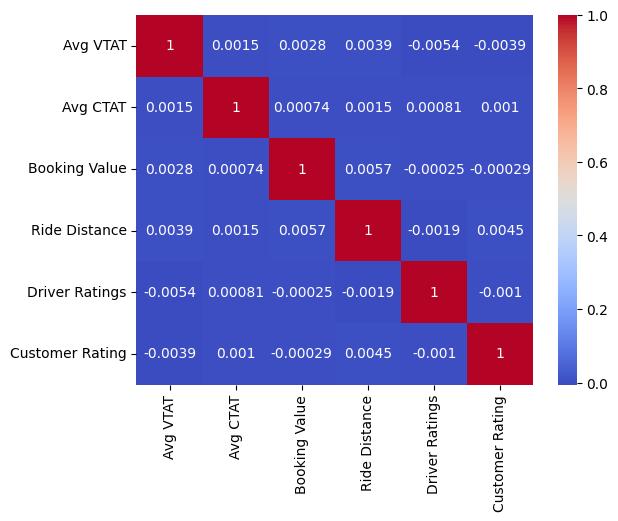

In [61]:
import seaborn as sns
numerical_columns = newdf.select_dtypes(include="number")
numerical_columns.corr()
sns.heatmap(numerical_columns.corr(),annot=True,cmap="coolwarm")

In [62]:
print(newdf["Date"][2])
newdf["Time"][2]

2024-08-23


'08:56:10'

In [5]:

newdf['datetime'] = pd.to_datetime(newdf['Date'].astype(str) + ' ' + newdf['Time'].astype(str))
newdf["Year"] = newdf["datetime"].dt.year
newdf["Month"] = newdf["datetime"].dt.month
newdf["WeekDay"] = newdf["datetime"].dt.day_of_week
newdf["Hour"] = newdf["datetime"].dt.hour

In [6]:
newdf = newdf.drop(["datetime","Date","Time","Booking Status"], axis = 1)
newdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Booking ID       93000 non-null  object 
 1   Customer ID      93000 non-null  object 
 2   Vehicle Type     93000 non-null  object 
 3   Pickup Location  93000 non-null  object 
 4   Drop Location    93000 non-null  object 
 5   Avg VTAT         93000 non-null  float64
 6   Avg CTAT         93000 non-null  float64
 7   Booking Value    93000 non-null  float64
 8   Ride Distance    93000 non-null  float64
 9   Driver Ratings   93000 non-null  float64
 10  Customer Rating  93000 non-null  float64
 11  Payment Method   93000 non-null  object 
 12  Year             93000 non-null  int32  
 13  Month            93000 non-null  int32  
 14  WeekDay          93000 non-null  int32  
 15  Hour             93000 non-null  int32  
dtypes: float64(6), int32(4), object(6)
memory usage: 10.6+ MB


In [80]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Booking ID       93000 non-null  object 
 1   Customer ID      93000 non-null  object 
 2   Vehicle Type     93000 non-null  object 
 3   Pickup Location  93000 non-null  object 
 4   Drop Location    93000 non-null  object 
 5   Avg VTAT         93000 non-null  float64
 6   Avg CTAT         93000 non-null  float64
 7   Booking Value    93000 non-null  float64
 8   Ride Distance    93000 non-null  float64
 9   Driver Ratings   93000 non-null  float64
 10  Customer Rating  93000 non-null  float64
 11  Payment Method   93000 non-null  object 
 12  Year             93000 non-null  int32  
 13  Month            93000 non-null  int32  
 14  WeekDay          93000 non-null  int32  
 15  Hour             93000 non-null  int32  
dtypes: float64(6), int32(4), object(6)
memory usage: 10.6+ MB


In [83]:
len(newdf["Booking ID"].unique())



92551

In [7]:
newdf2 = pd.get_dummies(newdf,columns=["Vehicle Type"], prefix= "Vehicle", drop_first= True)
newdf2 = pd.get_dummies(newdf2,columns=["Payment Method"], prefix= "Payment", drop_first= True)

newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Booking ID             93000 non-null  object 
 1   Customer ID            93000 non-null  object 
 2   Pickup Location        93000 non-null  object 
 3   Drop Location          93000 non-null  object 
 4   Avg VTAT               93000 non-null  float64
 5   Avg CTAT               93000 non-null  float64
 6   Booking Value          93000 non-null  float64
 7   Ride Distance          93000 non-null  float64
 8   Driver Ratings         93000 non-null  float64
 9   Customer Rating        93000 non-null  float64
 10  Year                   93000 non-null  int32  
 11  Month                  93000 non-null  int32  
 12  WeekDay                93000 non-null  int32  
 13  Hour                   93000 non-null  int32  
 14  Vehicle_Bike           93000 non-null  bool   
 15  Vehicl

In [98]:
len(newdf2["Pickup Location"].unique())

176

In [8]:
newdf2["Pickup_Freq"] = newdf2["Pickup Location"].map(newdf2["Pickup Location"].value_counts())
newdf2["Drop_Freq"] = newdf2["Drop Location"].map(newdf2["Drop Location"].value_counts())
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Booking ID             93000 non-null  object 
 1   Customer ID            93000 non-null  object 
 2   Pickup Location        93000 non-null  object 
 3   Drop Location          93000 non-null  object 
 4   Avg VTAT               93000 non-null  float64
 5   Avg CTAT               93000 non-null  float64
 6   Booking Value          93000 non-null  float64
 7   Ride Distance          93000 non-null  float64
 8   Driver Ratings         93000 non-null  float64
 9   Customer Rating        93000 non-null  float64
 10  Year                   93000 non-null  int32  
 11  Month                  93000 non-null  int32  
 12  WeekDay                93000 non-null  int32  
 13  Hour                   93000 non-null  int32  
 14  Vehicle_Bike           93000 non-null  bool   
 15  Vehicl

In [9]:
dropfeatures = ["Booking ID","Pickup Location", "Customer ID", "Drop Location"]
newdf2 = newdf2.drop(dropfeatures, axis = 1)

In [10]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93000 entries, 2 to 149999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avg VTAT               93000 non-null  float64
 1   Avg CTAT               93000 non-null  float64
 2   Booking Value          93000 non-null  float64
 3   Ride Distance          93000 non-null  float64
 4   Driver Ratings         93000 non-null  float64
 5   Customer Rating        93000 non-null  float64
 6   Year                   93000 non-null  int32  
 7   Month                  93000 non-null  int32  
 8   WeekDay                93000 non-null  int32  
 9   Hour                   93000 non-null  int32  
 10  Vehicle_Bike           93000 non-null  bool   
 11  Vehicle_Go Mini        93000 non-null  bool   
 12  Vehicle_Go Sedan       93000 non-null  bool   
 13  Vehicle_Premier Sedan  93000 non-null  bool   
 14  Vehicle_Uber XL        93000 non-null  bool   
 15  Vehicl

In [20]:
(newdf2["Customer Rating"] > 4).sum()

78912

In [21]:
newdf2["Customer Rating"] = newdf2["Customer Rating"] >4


In [54]:
(newdf2["Customer Rating"] == True).sum()

78912

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = newdf2.drop("Customer Rating", axis=1)
y = newdf2["Customer Rating"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, shuffle=True)



15775

In [48]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(max_iter=5000, C = 1,random_state=42)
lrm.fit(xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import r2_score
ypred = lrm.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))
print(recall_score(ytest, ypred))
print(f1_score(ytest, ypred))
print( confusion_matrix(ytest, ypred))

0.8491935483870968
0.8491935483870968
1.0
0.9184474487570868
[[    0  2805]
 [    0 15795]]


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,max_depth=22,random_state=42)
rfc.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,22
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
ypred = rfc.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))
print(recall_score(ytest, ypred))
print(f1_score(ytest, ypred))
print( confusion_matrix(ytest, ypred))

0.8491935483870968
0.8491935483870968
1.0
0.9184474487570868
[[    0  2805]
 [    0 15795]]


In [71]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=1.0)
svc.fit(xtrain,ytrain)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [72]:
ypred = svc.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))
print(recall_score(ytest, ypred))
print(f1_score(ytest, ypred))
print( confusion_matrix(ytest, ypred))

0.8481182795698925
0.8481182795698925
1.0
0.9178181818181819
[[    0  2825]
 [    0 15775]]
